# SNEAKER SITE WEB SCRAPE

The purpose of this program is aimed to conduct analytics of across various sneaker oriented websites

## PHASE 1: ENVIRONMENT SETUP

Import the necessary modules

In [606]:

import requests
import time as t
import pandas as pd
import datetime
import pprint
from datetime import date 

from bs4 import BeautifulSoup # to parse web page data
import glob # to read in files

# plotting modules
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.offline as po

# supervised learning modules
import statistics as stats
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# external python files
import plot_functions as pf
import text_functions as tf
# from collections import Counter
# from string import punctuation

Start time to calculate program duration

In [607]:
program_start = t.time()

Create a class in order to extract and create website objects

In [608]:
# 1.1 Class Declaration ------------------------------------------------------#
class sneaker_site:
    '''
    DESCRIPTION: Purpose of this class is to store website data located from various
        sneaker websites and retrieve pertinent key words from each object's scrape.
        The data scraped is then transformed into a tibble, which is then exported as 
        it's on individual CSV, later utilized for follow-on analytics
    '''
    
    # initialize the class
    def __init__ (self, name, url): # provide the name of the website and the url
        '''
        DESCRIPTION: initialize class with default class arguments
        '''
        self.website_name = name # set the name
        self.url = url # save the url
        self.site_text = '' # value to save the site text for each object
        self.converted_site_text = '' # converting the extracted value to lower case, via the 'text_functions' file
        self.lines = ''
        
        # create a dataframe to store extracted values for each object
        self.site_df = pd.DataFrame(columns = ['website','dtg', 'date','year', 'month', 'day', 'shoe_company', 'brand', 'count'])
        self.site_df['website'] = self.website_name # assign the website name to the entire class dataframe
        
        # creating Beautiful Soup variables to store individual values
        self.soup = '' # variable to store the complete values 
        self.hyperlink_list = '' # variable to store the hyperlinks tags
        self.paragraph_list = '' # variable to store paragraph value tags
        self.bold_list = '' # variable to store bold value tags
        
        # create the site variables to aggregate total counts for each object
        self.nike_site_count = 0
        self.adidas_site_count = 0
        self.reebok_site_count = 0
        self.new_balance_site_count = 0
        self.puma_site_count = 0
        self.vans_site_count = 0

        # default Nike list with different Nike shoe companies
        self.nike_master = ['nike', 'jordan', 'converse'] 
        # ['Nike', 'Air', 'Max', 'Jordan', 'Zoom', 'React', 'Shox', 'ACG', 'Max Plus', 'Joyride', 'Tinker', 'Force', 'Westbrook', 'Kyrie','Lebron', 'Durant', 'SB', 'Air Max 90', 'Air Max 97', 'Air Max 1', 'Kyrie', 'Air Max 270', 'Travis Scott' ]

        # default Adidas list with different Adidas shoe companies
        self.adidas_master = ['adidas', 'reebok', 'adidas', 'kanye', 'yeezy']
        # ['Adidas', 'ADIDAS', 'adidas', 'Yeezy', 'Kanye', 'Ultraboost', 'EQT', 'NMD', 'Ultra Boost', 'FYW', 'Harden']
        
        # default New Balance list 
        self.new_balance_master = ['NB', 'new balance']
        # ['New Balance', 'NB', 'Balance', '997', '801']
        
        # default Puma LIst
        self.puma_master = ['Puma', 'puma']
        #['Puma', 'Cell Venom', 'Thunder Spectre', 'Clyde Court']

        # default Vans list
        self.vans_master = ['Vans','vans']
        
        # concatenante the individual sneaker lists into one master list
        self.sneaker_list = self.nike_master + self.adidas_master + self.new_balance_master + self.puma_master + self.vans_master
        self.length = len(self.sneaker_list)         
        print("{} website object created".format(self.website_name))
    
    # class function to calculate the counts of each sneaker value in the master 'sneaker_list' data structure
    def site_calculate(self):
        '''
        DESCRIPTION: extract each website's raw data and append in the object's dataframe
        '''
        
        # to calculate the time needed to process the function from start to finish
        start_time = t.time() 
        print("\nRetrieving {} text and data ...".format(self.website_name))
        
        # establish connection to the website
        r = requests.get(self.url)
        self.soup = BeautifulSoup(r.content, "html.parser")
        
        # find and categorize all hyperlink (a), paragraph (p), and bold (b) html tags
        print("\nConsolidating all hyperlinks and paragraphs for", self.website_name)        
        self.hyperlink_list = self.soup.findAll('a')
        self.paragraph_list = self.soup.findAll('p')
        self.bold_list = self.soup.findAll('b')
        
        # convert individual Soup categories to text
        self.site_text = self.soup.get_text()
        self.converted_site_text = tf.normalize_string(self.site_text)
        print("\nConverting ", self.website_name, " to text file ... ")
        
        self.lines = [self.site_text.lower() for line in self.site_text]
        print("\nCalculating individual counts: " )
        
        index_num = 0

        # utilize the for loop to iterate over each object and count the .... 
        # ... amount of times a value is depicted in each extraction
        for brand in self.sneaker_list:
            
            # allocate object variables as values for the class dataframe
            website = self.website_name
            name = brand + ': '
            count = self.converted_site_text.count(brand) # count text items
            today = date.today()
            dtg = datetime.datetime.now()
            year = dtg.year
            month = dtg.month
            day_num = dtg.day

            shoe_company = ''
            
            # if count > 0 , aggregate the count based on shoe company name
            if count > 0:
                if brand in self.nike_master:
                    self.nike_site_count += count
                    shoe_company = 'Nike'
                elif brand in self.adidas_master:
                    self.adidas_site_count += count
                    shoe_company = 'Adidas'
                elif brand in self.new_balance_master:
                    self.new_balance_site_count += count
                    shoe_company = 'New Balance'
                elif brand in self.puma_master:
                    self.puma_site_count += count
                    shoe_company = 'Puma'
                elif brand in self.vans_master:
                    self.vans_site_count += count
                    shoe_company = 'Vans'
                else: 
                    0
            else: 
                if brand in self.nike_master:
                    shoe_company = 'Nike'
                elif brand in self.adidas_master:
                    shoe_company = 'Adidas'
                elif brand in self.new_balance_master:
                    shoe_company = 'New Balance'
                elif brand in self.puma_master:
                    shoe_company = 'Puma'
                elif brand in self.vans_master:
                    shoe_company = 'Vans'
                else: 
                    0      
                    
            # append each new row to the class dataframe
            self.site_df.loc[index_num] = [website, dtg, today, year, month, day_num, shoe_company, brand, count]        
            print(name, count)
            index_num += 1
        
        elapsed_time = t.time() - start_time 
        print("\n{} data ingest completed, total elapsed time: {} seconds\n".format(self.website_name, round(elapsed_time,2)))
        
    def display_info(self):
        '''
        DESCRIPTION: display object information
        '''
        print("\nCalculating total counts by shoe company...")
        print("Total Nike mentions: ", self.nike_site_count)
        print("Total Adidas mentions: ", self.adidas_site_count)
        print("Total New Balance mentions: ", self.new_balance_site_count)
        print("Total Puma mentions: ", self.puma_site_count)      
        print("Total Vans mentions: ", self.vans_site_count)      
        # print(self.site_df)      
        
    def return_df(self):
        '''
        DESCRIPTION: return class dataframe 
        '''
        return self.site_df

    def display_soup(self):
        '''
        DESCRIPTION: display hyperlinks for the object
        '''
        pp = pprint.PrettyPrinter(indent=4)
        pp.pprint(self.soup)
    
    def display_links(self):
        '''
        DESCRIPTION: display hyperlinks for the object
        '''
        pp = pprint.PrettyPrinter(indent=4)
        pp.pprint(self.hyperlink_list)
    
    def display_paragraphs(self):
        '''
        DESCRIPTION: display paragraphs for the object
        '''
        pp = pprint.PrettyPrinter(indent=4)
        pp.pprint(self.paragraph_list)
        
    def display_bold(self):
        '''
        DESCRIPTION: display bold tags for the object
        '''
        pp = pprint.PrettyPrinter(indent=4)
        pp.pprint(self.bold_list)  

Create a cummulative sum detection function

In [609]:
def cusum(df, time_col, val_col, running_avg_count, confidence_interval):
    '''
    Purpose: A timeseries function aimed to conduct a change point detection analysis of timeseries data
    '''
    
    mod_df = df[[time_col, val_col]]
    mod_df['cusum'] = mod_df[val_col].cusum()
    return mod_df

## PHASE 2: DATA ETL

### Sneakernews.com Exploration

In [610]:
## 2.1: SNEAKERNEWS.com ingest and analysis -----------------------------------#

start_time = t.time() # calculate elapsed time

sneaker_news = sneaker_site('sneakernews.com', 'https://sneakernews.com/')
sneaker_news.site_calculate()
sneaker_news.display_info()

elapsed_time = round(t.time() - start_time, 2)
print(" Total elapsed time in seconds: ", elapsed_time)

sneakernews.com website object created

Retrieving sneakernews.com text and data ...

Consolidating all hyperlinks and paragraphs for sneakernews.com

Converting  sneakernews.com  to text file ... 

Calculating individual counts: 
nike:  8
jordan:  23
converse:  2
adidas:  8
reebok:  2
adidas:  8
kanye:  0
yeezy:  10
NB:  0
new balance:  3
Puma:  0
puma:  2
Vans:  0
vans:  3

sneakernews.com data ingest completed, total elapsed time: 1.48 seconds


Calculating total counts by shoe company...
Total Nike mentions:  33
Total Adidas mentions:  28
Total New Balance mentions:  3
Total Puma mentions:  2
Total Vans mentions:  3
 Total elapsed time in seconds:  1.8


Display the extracted site information

In [611]:
sneaker_news.display_soup()

<!DOCTYPE html>

<html lang="en-US">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=5.0" name="viewport"/>
<link href="http://gmpg.org/xfn/11" rel="profile"/>
<!--Consent partner code -->
<script data-blockingmode="auto" data-cbid="3ed3f229-9ee7-4bbb-9ca8-3d34eebf881f" data-framework="IAB" id="Cookiebot" src="https://consent.cookiebot.com/uc.js" type="text/javascript"></script>
<!--Consent partner code -->
<meta content="#FFFFFF" name="msapplication-TileColor"/>
<meta content="https://sneakernews.com/wp-content/themes/sneakernews/images/favicon-144.png" name="msapplication-TileImage"/>
<meta content="https://sneakernews.com/wp-content/themes/sneakernews/images/browserconfig.xml" name="msapplication-config"/>
<meta content="672125259652768" property="fb:app_id">
<!-- Admin Facebook Profile ID -->
<link href="https://sneakernews.com/wp-content/themes/sneakernews/images/favicon_icon.png" rel="shortcut icon" sizes="32x32" type="image/png"

Display the corresponding sneakernews.com links

In [612]:
sneaker_news.display_links()

[   <a class="skip-link" href="#main-content">Skip to main content</a>,
    <a href="https://sneakernews.com/">
<img alt="default logo image" class="" src="https://sneakernews.com/wp-content/themes/sneakernews/images/site-logo.png"/> </a>,
    <a class="white-logo" href="https://sneakernews.com/">
<img alt="default logo image" class="" src="https://sneakernews.com/wp-content/themes/sneakernews/images/site-logo-white.png"/> </a>,
    <a href="https://sneakernews.com/">
<img alt="default logo image" class="" src="https://sneakernews.com/wp-content/themes/sneakernews/images/sticky-menu-logo.png"/><img alt="default logo image" class="white-logo" src="https://sneakernews.com/wp-content/themes/sneakernews/images/sticky-menu-logo-white.png"/> </a>,
    <a href="https://sneakernews.com/">News</a>,
    <a href="https://sneakernews.com/tag/where-to-buy/">Where To Buy</a>,
    <a href="/air-jordan-release-dates/">Jordan Release Dates</a>,
    <a href="https://sneakernews.com/adidas-yeezy-release-

Display sneakernews.com paragraphs

In [613]:
sneaker_news.display_paragraphs()

[   <p>
<a href="https://sneakernews.com/2020/09/23/air-jordan-1-high-dark-mocha-release-date/">Store List                                                        </a>
</p>,
    <p class="copyright">© 2007-2020 Sneaker News Inc<a class="powered-by-wpcom" href="https://wpvip.com/?utm_source=vip_powered_wpcom&amp;utm_medium=web&amp;utm_campaign=VIP%20Footer%20Credit&amp;utm_term=sneakernews.com" rel="generator nofollow"><img alt="Powered by WordPress.com VIP" height="26" src="https://sneakernews.com/wp-content/mu-plugins/vip-helpers/images/vip-powered-dark-small.png" width="187"/></a></p>]


In [614]:
sneaker_news.display_bold()

[]


Create a sneakernews.com dataframe from the extracted Beautiful Soup information

In [615]:
# retrieve master sneakernews.com dataframe
sneaker_news_df = sneaker_news.return_df()
sneaker_news_df.head(10)

,website,dtg,date,year,month,day,shoe_company,brand,count
0,sneakernews.com,2020-10-26 11:19:00.838698,2020-10-26,2020,10,26,Nike,nike,8
1,sneakernews.com,2020-10-26 11:19:00.848562,2020-10-26,2020,10,26,Nike,jordan,23
2,sneakernews.com,2020-10-26 11:19:00.853793,2020-10-26,2020,10,26,Nike,converse,2
3,sneakernews.com,2020-10-26 11:19:00.858896,2020-10-26,2020,10,26,Adidas,adidas,8
4,sneakernews.com,2020-10-26 11:19:00.863667,2020-10-26,2020,10,26,Adidas,reebok,2
5,sneakernews.com,2020-10-26 11:19:00.868081,2020-10-26,2020,10,26,Adidas,adidas,8
6,sneakernews.com,2020-10-26 11:19:00.872917,2020-10-26,2020,10,26,Adidas,kanye,0
7,sneakernews.com,2020-10-26 11:19:00.878702,2020-10-26,2020,10,26,Adidas,yeezy,10
8,sneakernews.com,2020-10-26 11:19:00.883709,2020-10-26,2020,10,26,New Balance,NB,0
9,sneakernews.com,2020-10-26 11:19:00.888418,2020-10-26,2020,10,26,New Balance,new balance,3


Plot total shoe company counts for sneakernews.com 

In [616]:
# website plotting
#pf.bar_chart(sneaker_news_df,'shoe_company', 'count', 'Sneakernews.com Count Summary')

sneaker_news_raw = sneaker_news_df[['shoe_company', 'count']]
sneaker_news_sum = sneaker_news_raw.groupby(['shoe_company']).sum().reset_index()

fig = px.bar(sneaker_news_df, x='shoe_company', y='count', color = 'shoe_company')
fig.show()

Display the percentage breakdown

In [617]:
# pie chart

fig = px.pie(sneaker_news_df, values='count', names='shoe_company')
fig.update_layout(
    title="sneakernews.com Shoe Company Mentions ",
    font=dict(
        family="Helvetica",
        size=12,
        color="#7f7f7f"
    )
)
fig.show()

## Solecollector.com Exploration

Create the solecollector.com object

In [618]:
## 2.2: SOLECOLLECTOR.com ingest and analysis ---------------------------------#

start_time = t.time() # calculate elapsed time

sole_collector = sneaker_site('Solecollector.com', 'https://solecollector.com/')
sole_collector.site_calculate()
sole_collector.display_info()

elapsed_time = round(t.time() - start_time, 2)
print(" Total elapsed time in seconds: ", elapsed_time)

Solecollector.com website object created

Retrieving Solecollector.com text and data ...

Consolidating all hyperlinks and paragraphs for Solecollector.com

Converting  Solecollector.com  to text file ... 

Calculating individual counts: 
nike:  6
jordan:  6
converse:  0
adidas:  1
reebok:  3
adidas:  1
kanye:  0
yeezy:  0
NB:  0
new balance:  0
Puma:  0
puma:  1
Vans:  0
vans:  0

Solecollector.com data ingest completed, total elapsed time: 1.22 seconds


Calculating total counts by shoe company...
Total Nike mentions:  12
Total Adidas mentions:  5
Total New Balance mentions:  0
Total Puma mentions:  1
Total Vans mentions:  0
 Total elapsed time in seconds:  1.54


Display the exctracted site information

In [619]:
sole_collector.display_soup()

<!DOCTYPE html>

<html lang="en">
<head>
<!-- Google Tag Manager -->
<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
    new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
    j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
    'https://www.googletagmanager.com/gtm.js?id='+i+dl+ '&gtm_auth=guf9DFXeULaZuL1R99BIhA&gtm_preview=env-1&gtm_cookies_win=x';f.parentNode.insertBefore(j,f);
    })(window,document,'script','dataLayer','GTM-5VPV4D');</script>
<!-- End Google Tag Manager -->
<script type="text/javascript">
        var _sf_async_config = _sf_async_config || {};
        /** CONFIGURATION START **/
        _sf_async_config.uid = 5098;// ACCOUNT NUMBER
        _sf_async_config.domain = 'solecollector.com';// DOMAIN
        _sf_async_config.flickerControl = false;
        _sf_async_config.useCanonical = true;
        /** CONFIGURATION END **/
        var _sf_startpt = (new Date()).getTime();
    </script>
<script async="" sr

Display the solecollector.com links

In [620]:
sole_collector.display_links()

[   <a href="/news/" target="_self">news</a>,
    <a href="/sneaker-release-dates/all-release-dates/" target="_self">release dates</a>,
    <a href="/sd/sole-search-sneaker-database/" target="_self">sole search</a>,
    <a href="/app/" target="_self">app</a>,
    <a ga-action="Click on main logo" ga-category="Main Header" ga-link="" href="/" target="_self">
<img alt="Sole Collector" src="https://images.solecollector.com/complex/image/upload/v1557174781/SC_Logo_TM_Blue_20190506-01_eeopog.svg"/>
</a>,
    <a ga-action="Click on social links" ga-label="Facebook" ga-link="" href="http://www.facebook.com/SoleCollectorMag" rel="nofollow" target="_blank">
<svg fill="#111111" height="20px" viewbox="0 0 200 200" width="20px" xmlns="http://www.w3.org/svg/2000"><path d="M115.4 65.5V48.3c0-2.6.1-4.6.4-6 .2-1.4.8-2.8 1.6-4.2.8-1.4 2.2-2.3 4.1-2.8 1.9-.5 4.4-.8 7.6-.8h17.2V0h-27.5c-15.9 0-27.4 3.8-34.3 11.3-7 7.6-10.5 18.8-10.5 33.5v20.8H53.4V100H74v100h41.4V100H143l3.6-34.5h-31.2z"></path></svg> </

Display solecollector.com paragraphs

In [621]:
sole_collector.display_paragraphs()

[   <p>SOLECOLLECTOR participates in various affiliate marketing programs, which means SOLECOLLECTOR gets paid commissions on purchases made through our links to retailer sites. Our editorial content is not influenced by any commissions we receive.</p>,
    <p>© 2020 Complex Media, Inc. All Rights Reserved.</p>]


In [622]:
sole_collector.display_bold()

[]


Create a solecollector.com dataframe for the extracted object

In [623]:
# retrieve master sneakernews.com dataframe
sole_collector_df = sole_collector.return_df()
sole_collector_df.head(10)

,website,dtg,date,year,month,day,shoe_company,brand,count
0,Solecollector.com,2020-10-26 11:19:03.139191,2020-10-26,2020,10,26,Nike,nike,6
1,Solecollector.com,2020-10-26 11:19:03.143589,2020-10-26,2020,10,26,Nike,jordan,6
2,Solecollector.com,2020-10-26 11:19:03.147713,2020-10-26,2020,10,26,Nike,converse,0
3,Solecollector.com,2020-10-26 11:19:03.152198,2020-10-26,2020,10,26,Adidas,adidas,1
4,Solecollector.com,2020-10-26 11:19:03.156344,2020-10-26,2020,10,26,Adidas,reebok,3
5,Solecollector.com,2020-10-26 11:19:03.160335,2020-10-26,2020,10,26,Adidas,adidas,1
6,Solecollector.com,2020-10-26 11:19:03.164741,2020-10-26,2020,10,26,Adidas,kanye,0
7,Solecollector.com,2020-10-26 11:19:03.168780,2020-10-26,2020,10,26,Adidas,yeezy,0
8,Solecollector.com,2020-10-26 11:19:03.172736,2020-10-26,2020,10,26,New Balance,NB,0
9,Solecollector.com,2020-10-26 11:19:03.176787,2020-10-26,2020,10,26,New Balance,new balance,0


Create a solecollector.com bar graph of shoe company mentions

In [624]:
# website plotting
#pf.bar_chart(sole_collector_df,'shoe_company', 'count', 'Solecollector.com')

sole_collector_raw = sole_collector_df[['shoe_company', 'count']]
sole_collector_final = sole_collector_raw.groupby(['shoe_company']).sum().reset_index()

fig = px.bar(sole_collector_final, x='shoe_company', y='count', color = 'shoe_company')
fig.show()

Display the percentage breakdown

In [625]:
# pf.pie_chart(sole_collector_df,'shoe_company', 'count', 'Solecollector.com')

fig = px.pie(sole_collector_df, values='count', names='shoe_company')
fig.update_layout(
    title="solecollector.com Shoe Company Mentions ",
    font=dict(
        family="Helvetica",
        size=12,
        color="#7f7f7f"
    )
)
fig.show()

## Hypebeast.com Exploration

Create the hypebeast.com object

In [626]:
# 2.3: HYPEBEAST.com ingest and analysis -------------------------------------#

start_time = t.time() # calculate start time

hypebeast = sneaker_site('hypebeast.com', 'https://hypebeast.com/')
hypebeast.site_calculate()
hypebeast.display_info()

elapsed_time = round(t.time() - start_time, 2)
print(" Total elapsed time in seconds: ", elapsed_time)

hypebeast.com website object created

Retrieving hypebeast.com text and data ...

Consolidating all hyperlinks and paragraphs for hypebeast.com

Converting  hypebeast.com  to text file ... 

Calculating individual counts: 
nike:  2
jordan:  0
converse:  0
adidas:  0
reebok:  2
adidas:  0
kanye:  1
yeezy:  2
NB:  0
new balance:  0
Puma:  0
puma:  0
Vans:  0
vans:  0

hypebeast.com data ingest completed, total elapsed time: 2.31 seconds


Calculating total counts by shoe company...
Total Nike mentions:  2
Total Adidas mentions:  5
Total New Balance mentions:  0
Total Puma mentions:  0
Total Vans mentions:  0
 Total elapsed time in seconds:  2.39


Display all extracted raw hypebeast.com information

In [627]:
hypebeast.display_soup()


<!DOCTYPE html>

<html>
<head>
<script type="text/javascript">
            var themeCookie = 'light';

            var cookieName = 'hb-theme';

            if (window.matchMedia('(prefers-color-scheme: dark)').matches) {
                themeCookie = 'dark';
            } else if (window.matchMedia('(prefers-color-scheme: light)').matches) {
                themeCookie = 'light';
            }

            var cookiearray = document.cookie.split(';');

            // Now take key value pair out of this array
            if (document.cookie) {
                for (var i = 0; i < cookiearray.length; i++) {
                    var name = cookiearray[i].split('=')[0].trim();
                    var value = cookiearray[i].split('=')[1].trim();

                    if (name === cookieName) {
                        themeCookie = value;
                    }
                }
            }

                        function SetDarkMode() {
                if (themeCookie) {
                 

Display the hypebeast.com links

In [628]:
hypebeast.display_links()

[   <a @click.prevent="toggleMobileMenu" href="#" id="mobile-menu-toggle"><span class="icon icon-navbar-hamburger"></span></a>,
    <a href="https://hypebeast.com/"><img alt="HYPEBEAST" class="img-fluid" src="https://static.hypebeast.com/dist/hypebeast/images/hypebeast-logo.9c8ee5f7.svg"/></a>,
    <a href="#" itemprop="url">Sections</a>,
    <a class="scale-effect" ga-event-action="clicks_category" ga-event-category="navigation bar" ga-event-label="https://hypebeast.com/fashion" ga-on="click" href="https://hypebeast.com/fashion"><img alt="Fashion" class="img-fluid" src="https://image-cdn.hypb.st/https%3A%2F%2Fhypebeast.com%2Fimage%2F2020%2F10%2Fyeezy-gap-catalog-items-run-through-release-info-price-kanye-west-0.jpg?w=720&amp;cbr=1&amp;q=90&amp;fit=max"/></a>,
    <a class="scale-effect" ga-event-action="clicks_category" ga-event-category="navigation bar" ga-event-label="https://hypebeast.com/footwear" ga-on="click" href="https://hypebeast.com/footwear"><img alt="Footwear" class="img-f

Display hypebeast.com paragraphs

In [629]:
hypebeast.display_paragraphs()

[   <p class="update"></p>,
    <p class="intro">Gain access to exclusive interviews with industry creatives, think pieces, trend forecasts, guides and more.</p>,
    <p>2020 Hypebeast Limited. All Rights Reserved.</p>,
    <p class="footer-links">
<span><a href="https://hypebeast.com/terms">Terms &amp; Conditions</a></span>
<span><a href="https://hypebeast.com/privacy">Privacy Policy</a></span>
</p>,
    <p>HYPEBEAST® is a registered trademark of Hypebeast Hong Kong Ltd.</p>,
    <p class="update"></p>,
    <p class="intro">Gain access to exclusive interviews with industry creatives, think pieces, trend forecasts, guides and more.</p>,
    <p class="message">
                                    Receive the latest updates, breaking stories and headlining articles curated by our editorial team just for you.
                                </p>]


In [630]:
hypebeast.display_bold()

[]


Create the hypebeast.com dataframe from the raw data set

In [631]:
# retrieve master hypebeast.com dataframe
hypebeast_df = hypebeast.return_df()
hypebeast_df.head(10)

,website,dtg,date,year,month,day,shoe_company,brand,count
0,hypebeast.com,2020-10-26 11:19:07.365213,2020-10-26,2020,10,26,Nike,nike,2
1,hypebeast.com,2020-10-26 11:19:07.370245,2020-10-26,2020,10,26,Nike,jordan,0
2,hypebeast.com,2020-10-26 11:19:07.374413,2020-10-26,2020,10,26,Nike,converse,0
3,hypebeast.com,2020-10-26 11:19:07.378703,2020-10-26,2020,10,26,Adidas,adidas,0
4,hypebeast.com,2020-10-26 11:19:07.382939,2020-10-26,2020,10,26,Adidas,reebok,2
5,hypebeast.com,2020-10-26 11:19:07.387166,2020-10-26,2020,10,26,Adidas,adidas,0
6,hypebeast.com,2020-10-26 11:19:07.391301,2020-10-26,2020,10,26,Adidas,kanye,1
7,hypebeast.com,2020-10-26 11:19:07.395559,2020-10-26,2020,10,26,Adidas,yeezy,2
8,hypebeast.com,2020-10-26 11:19:07.399822,2020-10-26,2020,10,26,New Balance,NB,0
9,hypebeast.com,2020-10-26 11:19:07.403993,2020-10-26,2020,10,26,New Balance,new balance,0


Plot the shoe company mentions for hypebeast.com

In [632]:
# website plotting
#pf.bar_chart(hypebeast_df,'shoe_company', 'count', 'Hypebeast.com')

hypebeast_raw = hypebeast_df[['shoe_company', 'count']]
hypebeast_final = hypebeast_raw.groupby(['shoe_company']).sum().reset_index()

fig = px.bar(hypebeast_final, x='shoe_company', y='count', color = 'shoe_company')
fig.show()

Display the percentage breakdown for hypebeast.com

In [633]:
#pf.pie_chart(hypebeast_df,'shoe_company', 'count', 'Hypebeast.com')


df = px.data.tips()
fig = px.pie(hypebeast_df, values='count', names='shoe_company')
fig.update_layout(
    title="Hypebeast.com Shoe Company Mentions ",
    font=dict(
        family="Helvetica",
        size=12,
        color="#7f7f7f"
    )
)
fig.show()
print("\n End of Phase 2 ...\n")


 End of Phase 2 ...



## PHASE 3: MACRO LEVEL ANALYSIS

The purpose of this phase is to conduct a top level analysis of all cummulative data for the day executed.  The program concats three (3) x separate data frames into master dataframe, day_df.

In [634]:
sneaker_news_df

,website,dtg,date,year,month,day,shoe_company,brand,count
0,sneakernews.com,2020-10-26 11:19:00.838698,2020-10-26,2020,10,26,Nike,nike,8
1,sneakernews.com,2020-10-26 11:19:00.848562,2020-10-26,2020,10,26,Nike,jordan,23
2,sneakernews.com,2020-10-26 11:19:00.853793,2020-10-26,2020,10,26,Nike,converse,2
3,sneakernews.com,2020-10-26 11:19:00.858896,2020-10-26,2020,10,26,Adidas,adidas,8
4,sneakernews.com,2020-10-26 11:19:00.863667,2020-10-26,2020,10,26,Adidas,reebok,2
5,sneakernews.com,2020-10-26 11:19:00.868081,2020-10-26,2020,10,26,Adidas,adidas,8
6,sneakernews.com,2020-10-26 11:19:00.872917,2020-10-26,2020,10,26,Adidas,kanye,0
7,sneakernews.com,2020-10-26 11:19:00.878702,2020-10-26,2020,10,26,Adidas,yeezy,10
8,sneakernews.com,2020-10-26 11:19:00.883709,2020-10-26,2020,10,26,New Balance,NB,0
9,sneakernews.com,2020-10-26 11:19:00.888418,2020-10-26,2020,10,26,New Balance,new balance,3


Concat the three individual class objects (sneaker_news_df, sole_collector_df, hypebeast_df) as a master dataframe, day_master

In [635]:
print("\n Starting Phase 3 ...\n")

# concat the three dataframes into a single, unified dataframe
frames = [sneaker_news_df, sole_collector_df, hypebeast_df]
day_master = pd.concat(frames)
day_master['short_date'] = day_master['dtg'].dt.date

day_master


 Starting Phase 3 ...



,website,dtg,date,year,month,day,shoe_company,brand,count,short_date
0,sneakernews.com,2020-10-26 11:19:00.838698,2020-10-26,2020,10,26,Nike,nike,8,2020-10-26
1,sneakernews.com,2020-10-26 11:19:00.848562,2020-10-26,2020,10,26,Nike,jordan,23,2020-10-26
2,sneakernews.com,2020-10-26 11:19:00.853793,2020-10-26,2020,10,26,Nike,converse,2,2020-10-26
3,sneakernews.com,2020-10-26 11:19:00.858896,2020-10-26,2020,10,26,Adidas,adidas,8,2020-10-26
4,sneakernews.com,2020-10-26 11:19:00.863667,2020-10-26,2020,10,26,Adidas,reebok,2,2020-10-26
5,sneakernews.com,2020-10-26 11:19:00.868081,2020-10-26,2020,10,26,Adidas,adidas,8,2020-10-26
6,sneakernews.com,2020-10-26 11:19:00.872917,2020-10-26,2020,10,26,Adidas,kanye,0,2020-10-26
7,sneakernews.com,2020-10-26 11:19:00.878702,2020-10-26,2020,10,26,Adidas,yeezy,10,2020-10-26
8,sneakernews.com,2020-10-26 11:19:00.883709,2020-10-26,2020,10,26,New Balance,NB,0,2020-10-26
9,sneakernews.com,2020-10-26 11:19:00.888418,2020-10-26,2020,10,26,New Balance,new balance,3,2020-10-26


Plot the consolidated shoe company mention count for all three sites

In [636]:
#pf.bar_chart(day_master,'shoe_company', 'count', 'Consolidated Bar Chart Report')

day_raw = day_master[['shoe_company', 'count']]
day_df = day_raw.groupby(['shoe_company']).sum().reset_index()

fig = px.bar(day_df, x='shoe_company', y='count', color = 'shoe_company')
fig.show()

Plot the percentage breakdown for the day

In [637]:
#pf.pie_chart(day_master,'shoe_company', 'count', 'Consolidated Pie Report')

df = px.data.tips()
fig = px.pie(day_master, values='count', names='shoe_company')
fig.update_layout(
    title="Shoe Company Mentions (Cummulative) ",
    font=dict(
        family="Helvetica",
        size=12,
        color="#7f7f7f"
    )
)
fig.show()

Export the daily file to the root storage folder

In [638]:
path = '/Users/patrickbenitez/Desktop/GT/Codebook/Git/Py.sneakernews.webscrape/df_exports/'
# Converting date into DD-MM-YYYY format
temp_date = datetime.datetime.today()

file_date = temp_date.strftime('%Y-%m-%d')

In [639]:
# create the full file path
full_path = path + "v3_" +  file_date + ".csv"

# export the file to the /df_exports/ directory
day_master.to_csv(full_path)

print("\nFile successfully exported!")


File successfully exported!


Summarize daily counts

In [640]:
day_master

,website,dtg,date,year,month,day,shoe_company,brand,count,short_date
0,sneakernews.com,2020-10-26 11:19:00.838698,2020-10-26,2020,10,26,Nike,nike,8,2020-10-26
1,sneakernews.com,2020-10-26 11:19:00.848562,2020-10-26,2020,10,26,Nike,jordan,23,2020-10-26
2,sneakernews.com,2020-10-26 11:19:00.853793,2020-10-26,2020,10,26,Nike,converse,2,2020-10-26
3,sneakernews.com,2020-10-26 11:19:00.858896,2020-10-26,2020,10,26,Adidas,adidas,8,2020-10-26
4,sneakernews.com,2020-10-26 11:19:00.863667,2020-10-26,2020,10,26,Adidas,reebok,2,2020-10-26
5,sneakernews.com,2020-10-26 11:19:00.868081,2020-10-26,2020,10,26,Adidas,adidas,8,2020-10-26
6,sneakernews.com,2020-10-26 11:19:00.872917,2020-10-26,2020,10,26,Adidas,kanye,0,2020-10-26
7,sneakernews.com,2020-10-26 11:19:00.878702,2020-10-26,2020,10,26,Adidas,yeezy,10,2020-10-26
8,sneakernews.com,2020-10-26 11:19:00.883709,2020-10-26,2020,10,26,New Balance,NB,0,2020-10-26
9,sneakernews.com,2020-10-26 11:19:00.888418,2020-10-26,2020,10,26,New Balance,new balance,3,2020-10-26


## PHASE 4: CSV IMPORT AND EXPLORATION

The purpose of this phase is to conduct historical level analysis of all cummulative data extracted since project inception.  The program invokes the 'glob' module in order to import all standalone csv files from previous daily extracts.

Due to continuous improvements in the master branch, historical data is formatted in three (3) x separate versions. The glob function imports these three (3) x separate versions for all stored files and conditions the data in order to conduct unified analysis on one master dataframe

In [641]:
## 4.1: Determine all version 1.0 files located in the 'df_exports' directory--#
import glob # to read in multiple csv files


print("\nRetrieving version 1.0 csv files ...")

csv_list = [] # store values in the list



Retrieving version 1.0 csv files ...


In [642]:
# import version 1.0 files
for csv_file_v1 in glob.glob('df_exports/v1_*.csv'): # only retrieve "v1_" csv files
    csv_list.append(csv_file_v1)
    print (csv_file_v1)
    
print("\nTotal amount of v1.0 files: {}".format(len(csv_list)))

df_exports/v1_2019-11-18.csv
df_exports/v1_2019-11-24.csv
df_exports/v1_2019-11-30.csv
df_exports/v1_2019-11-25.csv
df_exports/v1_2019-11-19.csv
df_exports/v1_2019-11-27.csv
df_exports/v1_2019-11-26.csv
df_exports/v1_2019-11-22.csv
df_exports/v1_2019-11-23.csv
df_exports/v1_2019-11-21.csv
df_exports/v1_2019-11-20.csv
df_exports/v1_2019-12-02.csv
df_exports/v1_2019-12-03.csv
df_exports/v1_2019-12-01.csv
df_exports/v1_2019-12-14.csv
df_exports/v1_2019-12-10.csv
df_exports/v1_2019-12-11.csv
df_exports/v1_2019-12-05.csv
df_exports/v1_2019-12-07.csv
df_exports/v1_2019-12-06.csv
df_exports/v1_2019-12-12.csv
df_exports/v1_2019-12-20.csv
df_exports/v1_2019-12-08.csv
df_exports/v1_2019-12-09.csv
df_exports/v1_2019-12-19.csv
df_exports/v1_2019-11-17.csv
df_exports/v1_2019-11-16.csv
df_exports/v1_2019-11-28.csv
df_exports/v1_2019-11-29.csv

Total amount of v1.0 files: 29


In [643]:
# import version 2.0 files
for csv_file_v2 in glob.glob('df_exports/v2_*.csv'): # only retrieve "v2_" csv files
    csv_list.append(csv_file_v2)
    print (csv_file_v2)

print("\nTotal amount of v2.0 files: {}".format(len(csv_list)))

df_exports/v2_2020-01-23.csv
df_exports/v2_2019-12-28.csv
df_exports/v2_2020-01-09.csv
df_exports/v2_2020-01-21.csv
df_exports/v2_2020-03-18.csv
df_exports/v2_2020-01-20.csv
df_exports/v2_2020-01-08.csv
df_exports/v2_2019-12-29.csv
df_exports/v2_2020-01-24.csv
df_exports/v2_2020-01-18.csv
df_exports/v2_2020-03-21.csv
df_exports/v2_2020-03-09.csv
df_exports/v2_2020-03-20.csv
df_exports/v2_2020-01-25.csv
df_exports/v2_2020-01-27.csv
df_exports/v2_2020-01-26.csv
df_exports/v2_2020-02-17.csv
df_exports/v2_2020-02-29.csv
df_exports/v2_2020-02-15.csv
df_exports/v2_2020-02-14.csv
df_exports/v2_2020-02-18.csv
df_exports/v2_2020-02-27.csv
df_exports/v2_2020-02-21.csv
df_exports/v2_2019-12-22.csv
df_exports/v2_2020-01-03.csv
df_exports/v2_2020-01-17.csv
df_exports/v2_2020-03-06.csv
df_exports/v2_2020-03-12.csv
df_exports/v2_2020-03-13.csv
df_exports/v2_2020-03-07.csv
df_exports/v2_2020-01-02.csv
df_exports/v2_2019-12-23.csv
df_exports/v2_2019-12-21.csv
df_exports/v2_2020-01-28.csv
df_exports/v2_

Create a dataframe of version 1.0 and 2.0 files in order to change 'category_name' and 'item' column headers to 'shoe_company' and 'brand'

In [644]:
# 4.2: Read in each csv file into the master dataframe -----------------------#
# 4.2.1: read in the local files and aggregate as a single dataframe -#
old_df = pd.DataFrame(columns=['date', 'category_name', 'item', 'count'])

# extract the four columns from each csv file and append to 'master_df'
for csv_file in csv_list:
    temp_df = pd.read_csv(csv_file)
    sliced_df = temp_df[['date', 'category_name', 'item', 'count']]
    old_df = pd.concat([old_df, sliced_df])
    
old_df['count'] = old_df['count'].astype(int)
old_df['date'] = old_df['date'].astype('datetime64[ns]')
old_df.rename(columns = {'category_name':'shoe_company', 'item':'brand'}, inplace = True) 
old_df.head(25)

,date,shoe_company,brand,count
0,2019-11-18,Nike,Nike,9
1,2019-11-18,Nike,Jordan,20
2,2019-11-18,Nike,Converse,2
3,2019-11-18,Adidas,Adidas,0
4,2019-11-18,Adidas,Reebok,2
5,2019-11-18,Adidas,ADIDAS,0
6,2019-11-18,Adidas,Yeezy,8
7,2019-11-18,Adidas,Kanye,0
8,2019-11-18,Adidas,adidas,10
9,2019-11-18,Adidas,kanye,0


In [645]:
# import version 3.0 files

csv_list2 = [] # list to store csv version 3 files
for csv_file_v3 in glob.glob('df_exports/v3_*.csv'): # only retrieve "v2_" csv files
    csv_list2.append(csv_file_v3)
    print (csv_file_v3)

print("\nTotal amount of files: {}".format(len(csv_list2)))

df_exports/v3_2020-03-23.csv
df_exports/v3_2020-04-02.csv
df_exports/v3_2020-04-16.csv
df_exports/v3_2020-08-16.csv
df_exports/v3_2020-08-02.csv
df_exports/v3_2020-06-07.csv
df_exports/v3_2020-06-13.csv
df_exports/v3_2020-06-12.csv
df_exports/v3_2020-06-06.csv
df_exports/v3_2020-08-03.csv
df_exports/v3_2020-08-17.csv
df_exports/v3_2020-04-17.csv
df_exports/v3_2020-04-03.csv
df_exports/v3_2020-03-22.csv
df_exports/v3_2020-04-29.csv
df_exports/v3_2020-04-15.csv
df_exports/v3_2020-04-01.csv
df_exports/v3_2020-08-01.csv
df_exports/v3_2020-08-15.csv
df_exports/v3_2020-06-10.csv
df_exports/v3_2020-06-04.csv
df_exports/v3_2020-06-05.csv
df_exports/v3_2020-06-11.csv
df_exports/v3_2020-04-28.csv
df_exports/v3_2020-04-10.csv
df_exports/v3_2020-04-04.csv
df_exports/v3_2020-03-25.csv
df_exports/v3_2020-03-31.csv
df_exports/v3_2020-06-15.csv
df_exports/v3_2020-06-01.csv
df_exports/v3_2020-06-29.csv
df_exports/v3_2020-08-10.csv
df_exports/v3_2020-06-28.csv
df_exports/v3_2020-08-05.csv
df_exports/v3_

In [646]:
# 4.2: Read in each csv file into the master dataframe -----------------------#
# 4.2.1: read in the local files and aggregate as a single dataframe -#
master_df = pd.DataFrame(columns=['date', 'shoe_company', 'brand', 'count'])

# extract the four columns from each csv file and append to 'master_df'
for csv_file in csv_list2:
    temp_df = pd.read_csv(csv_file)
    sliced_df = temp_df[['date', 'shoe_company', 'brand', 'count']]
    master_df = pd.concat([master_df, sliced_df])
    
master_df['count'] = master_df['count'].astype(int)
master_df['date'] = master_df['date'].astype('datetime64[ns]')
master_df.dtypes
master_df.head(10)

,date,shoe_company,brand,count
0,2020-03-23,Nike,nike,8
1,2020-03-23,Nike,jordan,22
2,2020-03-23,Nike,converse,4
3,2020-03-23,Adidas,adidas,10
4,2020-03-23,Adidas,reebok,2
5,2020-03-23,Adidas,adidas,10
6,2020-03-23,Adidas,kanye,0
7,2020-03-23,Adidas,yeezy,7
8,2020-03-23,New Balance,NB,0
9,2020-03-23,New Balance,new balance,3


In [647]:
final_df = old_df.append(master_df)
final_df.tail(10)

,date,shoe_company,brand,count
32,2020-08-26,Adidas,reebok,0
33,2020-08-26,Adidas,adidas,3
34,2020-08-26,Adidas,kanye,0
35,2020-08-26,Adidas,yeezy,0
36,2020-08-26,New Balance,NB,0
37,2020-08-26,New Balance,new balance,0
38,2020-08-26,Puma,Puma,0
39,2020-08-26,Puma,puma,1
40,2020-08-26,Vans,Vans,0
41,2020-08-26,Vans,vans,0


Display the histogram count

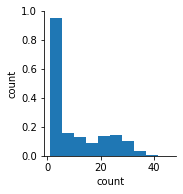

In [648]:
# group by sum the master_df dataframe for follow-on analysis
master_sum_df = final_df.groupby(['date','shoe_company', 'brand']).sum().reset_index()
summarized_df = master_sum_df[master_sum_df['count'] != 0]
summarized_df.head(5)

sns.pairplot(summarized_df)

In [649]:
master_sum_df

,date,shoe_company,brand,count
0,2019-11-16,Adidas,ADIDAS,0
1,2019-11-16,Adidas,Adidas,5
2,2019-11-16,Adidas,Kanye,2
3,2019-11-16,Adidas,Reebok,3
4,2019-11-16,Adidas,Yeezy,8
...,...,...,...,...
3629,2020-10-26,Nike,nike,16
3630,2020-10-26,Puma,Puma,0
3631,2020-10-26,Puma,puma,3
3632,2020-10-26,Vans,Vans,0


Drop the 'brand' column from the master_sum_df and name new df as 'category_df'

In [650]:
# 4.2.2: Unstack and pairplot the master dataframe for category_name df - #
category_df = master_sum_df[['date','shoe_company','count']]
category_df = category_df.groupby(['date','shoe_company']).sum().reset_index()
category_df.head(10)

,date,shoe_company,count
0,2019-11-16,Adidas,26
1,2019-11-16,New Balance,3
2,2019-11-16,Nike,57
3,2019-11-16,Puma,4
4,2019-11-16,Vans,2
5,2019-11-17,Adidas,25
6,2019-11-17,New Balance,3
7,2019-11-17,Nike,52
8,2019-11-17,Puma,4
9,2019-11-17,Vans,4


Unstack the 'shoe_company' values as stand alone columns in order to conduct multivariate analysis

In [651]:
unstack_category_df = category_df.pivot_table(index = ['date'], 
                                   columns = 'shoe_company',
                                   values = 'count',
                                   aggfunc='first').reset_index().rename_axis(None, axis=1)

unstack_category_df.tail(10)

,date,Adidas,New Balance,Nike,Puma,Vans
255,2020-10-08,35,3,50,4,2
256,2020-10-11,33,3,47,3,5
257,2020-10-12,36,4,47,3,3
258,2020-10-18,33,3,48,3,5
259,2020-10-20,26,5,54,3,3
260,2020-10-21,33,5,51,3,4
261,2020-10-23,34,5,46,3,2
262,2020-10-24,45,4,44,3,2
263,2020-10-25,41,5,45,3,2
264,2020-10-26,38,3,47,3,3


Pairplot the 'unstack_category_df' dataframe

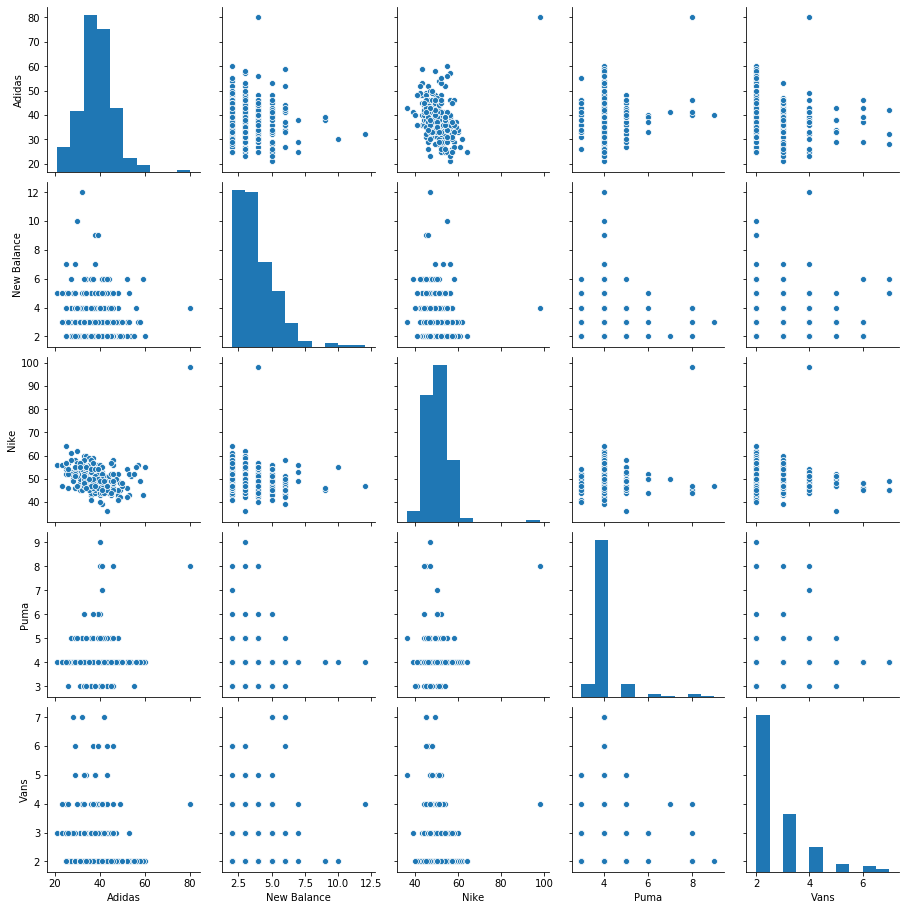

In [652]:
sns.pairplot(unstack_category_df) # pairplot the category dataframe

Create a new dataframe with 'brand' and 'date' values

In [653]:
item_temp_df = master_df[['date','brand','count']]
item2_df = item_temp_df.groupby(['date', 'brand']).sum().reset_index()

Remove rows where the count is equal to 0

In [654]:
# remove rows where count is equal to '0'
item_df = item2_df[item2_df['count'] != 0]
item_df.head(20)

,date,brand,count
3,2020-03-22,adidas,28
4,2020-03-22,converse,3
5,2020-03-22,jordan,26
7,2020-03-22,new balance,4
8,2020-03-22,nike,19
9,2020-03-22,puma,4
10,2020-03-22,reebok,3
11,2020-03-22,vans,2
12,2020-03-22,yeezy,7
16,2020-03-23,adidas,28


Unstack the 'item_df' dataframe in order to conduct follow-on multivariate regression analysis

In [655]:
unstack_item_df = item_df.pivot_table(index = ['date'],
                                      columns = 'brand',
                                      values = 'count',
                                      aggfunc='first').reset_index().rename_axis(None, axis=1)

unstack_item_df.tail(50)

,date,adidas,converse,jordan,kanye,new balance,nike,puma,reebok,vans,yeezy
127,2020-08-12,30.0,3.0,26.0,1.0,6.0,16.0,4.0,4.0,6.0,8.0
128,2020-08-15,20.0,4.0,26.0,NaN,5.0,21.0,4.0,3.0,5.0,6.0
129,2020-08-16,20.0,3.0,27.0,2.0,3.0,17.0,5.0,4.0,5.0,8.0
130,2020-08-17,28.0,3.0,24.0,1.0,2.0,20.0,4.0,4.0,4.0,10.0
131,2020-08-19,26.0,3.0,20.0,NaN,4.0,25.0,4.0,3.0,4.0,8.0
132,2020-08-20,18.0,3.0,22.0,2.0,4.0,22.0,5.0,3.0,4.0,7.0
133,2020-08-21,20.0,3.0,26.0,1.0,3.0,17.0,4.0,6.0,4.0,10.0
134,2020-08-22,26.0,3.0,27.0,1.0,4.0,14.0,4.0,3.0,4.0,12.0
135,2020-08-23,16.0,3.0,24.0,NaN,3.0,19.0,4.0,3.0,4.0,7.0
136,2020-08-24,14.0,3.0,25.0,NaN,5.0,19.0,4.0,3.0,4.0,6.0


Pairplot the 'unstack_item_df' dataframe

Create a count for each date

In [656]:
# 4.2.4: Date and Count dataframe
date_count_temp = final_df[['date','count']]
date_count_df = date_count_temp.groupby('date').sum().reset_index()
date_count_df.tail()

,date,count
260,2020-10-21,96
261,2020-10-23,90
262,2020-10-24,98
263,2020-10-25,96
264,2020-10-26,94


Create a timeseries plot of all counts by day

In [657]:
# master counts, company agnostic

fig = px.line(date_count_df, x='date', y='count')
fig.update_layout(
    title="Shoe Company Daily Count Summary",
    xaxis_title="Date",
    yaxis_title="Total Daily Counts",
    font=dict(
        family="Helvetica",
        size=12,
        color="#7f7f7f"
    )
)
fig.show()

Create timeseries analysis, categorized by shoe company

In [658]:
# master counts, by day and shoe company

# 4.2.4: Date and Count dataframe
date_shoe_temp = final_df[['date','shoe_company', 'count']]
date_shoe_df = date_shoe_temp.groupby(['date', 'shoe_company']).sum().reset_index()

fig = px.line(date_shoe_df, x='date', y='count', color='shoe_company')
fig.update_layout(
    title="Shoe Company Daily Count Summary",
    xaxis_title="Date",
    yaxis_title="Total Daily Counts",
    font=dict(
        family="Helvetica",
        size=12,
        color="#7f7f7f"
    )
)
fig.show()

Display the area chart

In [659]:
fig = px.area(date_shoe_df, x='date', y='count', color = 'shoe_company')
fig.show()

Create a sankey chart in order to depict feeder flow from shoe company to brand

In [660]:
sum_df = master_df.groupby(['date', 'shoe_company', 'brand']).sum().reset_index()

fig = pf.genSankey(sum_df,cat_cols=['shoe_company', 'brand'],value_cols='count',title='Sneaker Sankey Analysis')
po.offline.plot(fig, validate=False)

'temp-plot.html'

### Multi-variate Regression Analysis

Slice dataframe in order to begin multivariate regression.

Set the shoe companie column values as the predictor variables, with 'total counts' serving as the response variable.

In [661]:
unstack_df = unstack_category_df.copy()
unstack_df.fillna(0, inplace = True)
unstack_df.head(10)

,date,Adidas,New Balance,Nike,Puma,Vans
0,2019-11-16,26,3,57,4,2
1,2019-11-17,25,3,52,4,4
2,2019-11-18,31,3,52,4,2
3,2019-11-19,27,4,53,4,3
4,2019-11-20,25,4,54,4,3
5,2019-11-21,25,7,56,4,2
6,2019-11-22,33,4,49,4,2
7,2019-11-23,29,4,51,4,2
8,2019-11-24,31,4,48,4,2
9,2019-11-25,41,4,45,4,3


Create a new column of total counts, categorized by day

In [662]:
unstack_df['total_counts'] = unstack_df['Adidas']  + unstack_df['New Balance'] + unstack_df['Nike'] + unstack_df['Puma'] + unstack_df['Vans']

unstack_df.head(5)

,date,Adidas,New Balance,Nike,Puma,Vans,total_counts
0,2019-11-16,26,3,57,4,2,92
1,2019-11-17,25,3,52,4,4,88
2,2019-11-18,31,3,52,4,2,92
3,2019-11-19,27,4,53,4,3,91
4,2019-11-20,25,4,54,4,3,90


Create a dataframe with the predictor variables

In [663]:
X = unstack_df[['Adidas', 'New Balance','Nike','Puma','Vans']]
X

,Adidas,New Balance,Nike,Puma,Vans
0,26,3,57,4,2
1,25,3,52,4,4
2,31,3,52,4,2
3,27,4,53,4,3
4,25,4,54,4,3
...,...,...,...,...,...
260,33,5,51,3,4
261,34,5,46,3,2
262,45,4,44,3,2
263,41,5,45,3,2


Create the response variable values

In [664]:
y = unstack_df[['total_counts']]
y

,total_counts
0,92
1,88
2,92
3,91
4,90
...,...
260,96
261,90
262,98
263,96


### Build the linear regression model

Create the model boject

In [665]:
regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [666]:
print('Intercept: \n', regr.intercept_)

Intercept: 
 [0.]


In [667]:
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [[1. 1. 1. 1. 1.]]


Fit the model and predict values for each of the given records

In [668]:
# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

Print the model summary

In [669]:
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:           total_counts   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.259e+29
Date:                Mon, 26 Oct 2020   Prob (F-statistic):               0.00
Time:                        11:19:15   Log-Likelihood:                 7571.7
No. Observations:                 265   AIC:                        -1.513e+04
Df Residuals:                     259   BIC:                        -1.511e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4.974e-14   7.82e-14      0.636      

Build a three-dimensional plot of Nike vs. Adidas values

Slice out Nike and Adidas counts

In [670]:
tri_dim = unstack_df[['Adidas','Nike','total_counts']]
tri_dim

,Adidas,Nike,total_counts
0,26,57,92
1,25,52,88
2,31,52,92
3,27,53,91
4,25,54,90
...,...,...,...
260,33,51,96
261,34,46,90
262,45,44,98
263,41,45,96


Find the 95% confidence interval for total_counts column

In [671]:
import numpy as np, scipy.stats as st

count_list = list(tri_dim['total_counts'])
count_array = np.array(count_list)

lower, higher = st.t.interval(0.95, len(count_array)-1, loc=np.mean(count_array), scale=st.sem(count_array))


In [672]:
lower

97.80039561841383

In [673]:
higher

99.87507607969937

In [674]:
count_mask = (tri_dim['total_counts'] > lower) & (tri_dim['total_counts'] < higher)
tri_mask = tri_dim.loc[count_mask]

3D plot Nike vs. Adidas

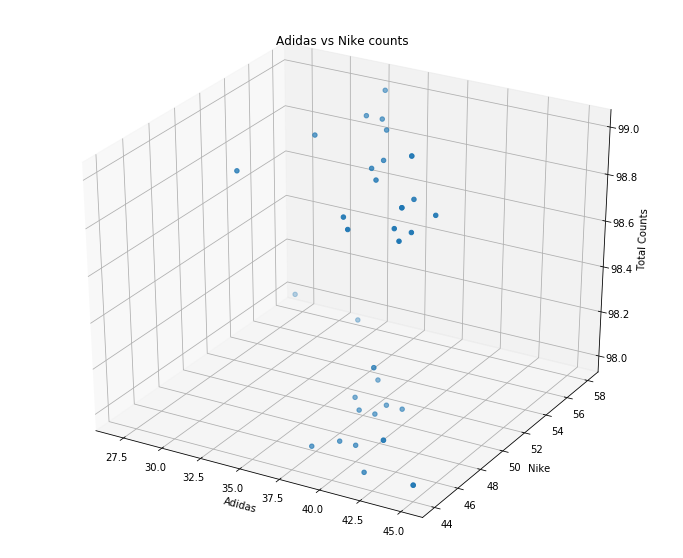

In [675]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

threedee = plt.figure(figsize = (12,10)).gca(projection='3d')
threedee.scatter(tri_mask['Adidas'], tri_mask['Nike'], tri_mask['total_counts'], cmap=cm.rainbow)
plt.title('Adidas vs Nike counts')
threedee.set_xlabel('Adidas')
threedee.set_ylabel('Nike')
threedee.set_zlabel('Total Counts')
plt.show()



## Change Point Detection

Retrieve data from the unstacked dataframe, previously aggregated

In [676]:
unstack_df.head(5)

,date,Adidas,New Balance,Nike,Puma,Vans,total_counts
0,2019-11-16,26,3,57,4,2,92
1,2019-11-17,25,3,52,4,4,88
2,2019-11-18,31,3,52,4,2,92
3,2019-11-19,27,4,53,4,3,91
4,2019-11-20,25,4,54,4,3,90


Slice on the 'date,' 'Nike,' and 'total_counts' columns

In [677]:
cusum_nike_raw = unstack_df[['date', 'Nike']]
cusum_nike_raw.head(5)

,date,Nike
0,2019-11-16,57
1,2019-11-17,52
2,2019-11-18,52
3,2019-11-19,53
4,2019-11-20,54


Invoke the cummulative sum for the Nike column

In [678]:
cusum_nike_raw['cusum'] = cusum_nike_raw['Nike'].cumsum()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Display the Nike data

In [679]:
cusum_nike_raw

,date,Nike,cusum
0,2019-11-16,57,57
1,2019-11-17,52,109
2,2019-11-18,52,161
3,2019-11-19,53,214
4,2019-11-20,54,268
...,...,...,...
260,2020-10-21,51,13124
261,2020-10-23,46,13170
262,2020-10-24,44,13214
263,2020-10-25,45,13259


Calculate running 3 day average

In [680]:
for i in range(0,cusum_nike_raw.shape[0]-2):
    cusum_nike_raw.loc[cusum_nike_raw.index[i+2],'Nike SMA_3'] = np.round(((cusum_nike_raw.iloc[i,1]+ cusum_nike_raw.iloc[i+1,1] + cusum_nike_raw.iloc[i+2,1])/3),1)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:844: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Display the top 15 values

In [681]:
cusum_nike_raw.head(15)

,date,Nike,cusum,Nike SMA_3
0,2019-11-16,57,57,NaN
1,2019-11-17,52,109,NaN
2,2019-11-18,52,161,53.7
3,2019-11-19,53,214,52.3
4,2019-11-20,54,268,53.0
5,2019-11-21,56,324,54.3
6,2019-11-22,49,373,53.0
7,2019-11-23,51,424,52.0
8,2019-11-24,48,472,49.3
9,2019-11-25,45,517,48.0


Calculate rolling standard deviation

In [682]:
cusum_nike_raw['sigma_3day'] = cusum_nike_raw['Nike'].rolling(3).std()
cusum_nike_raw['sigma_7day'] = cusum_nike_raw['Nike'].rolling(7).std()
cusum_nike_raw.head(15)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,date,Nike,cusum,Nike SMA_3,sigma_3day,sigma_7day
0,2019-11-16,57,57,NaN,NaN,NaN
1,2019-11-17,52,109,NaN,NaN,NaN
2,2019-11-18,52,161,53.7,2.886751,NaN
3,2019-11-19,53,214,52.3,0.577350,NaN
4,2019-11-20,54,268,53.0,1.000000,NaN
5,2019-11-21,56,324,54.3,1.527525,NaN
6,2019-11-22,49,373,53.0,3.605551,2.690371
7,2019-11-23,51,424,52.0,3.605551,2.225395
8,2019-11-24,48,472,49.3,1.527525,2.794553
9,2019-11-25,45,517,48.0,3.000000,3.804759


Conver the cummulative column to a list 

In [683]:
nike_count_list = list(cusum_nike_raw['Nike'])
nike_count_list[:5]

[57, 52, 52, 53, 54]

Display the five number summary

In [684]:
print("Minimum value: ", np.min(nike_count_list))
print("Maximum value: ", np.max(nike_count_list))
print("Standard Deviation: ", np.std(nike_count_list))
print("Mean: ", np.mean(nike_count_list))
print("Median: ", np.median(nike_count_list))

Minimum value:  36
Maximum value:  98
Standard Deviation:  5.403062038111579
Mean:  50.21132075471698
Median:  50.0


Boxplot the findings

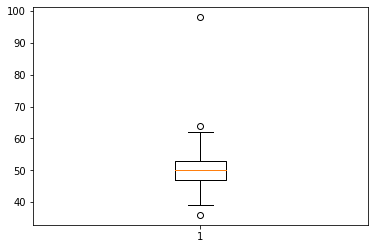

In [685]:
plt.boxplot(nike_count_list)
plt.show()

Create five number summary of the running 3 day standard deviation column

In [686]:
import math
ma_count_list = list(cusum_nike_raw['Nike SMA_3'])
cleaned_ma3_list = [0.0 if math.isnan(x) else x for x in ma_count_list]
cleaned_ma3_list[:5]

[0.0, 0.0, 53.7, 52.3, 53.0]

In [687]:
print("Minimum value: ", np.min(cleaned_ma3_list))
print("Maximum value: ", np.max(cleaned_ma3_list))
print("Standard Deviation: ", np.std(cleaned_ma3_list))
print("Mean: ", np.mean(cleaned_ma3_list))
print("Median: ", np.median(cleaned_ma3_list))

Minimum value:  0.0
Maximum value:  63.7
Standard Deviation:  5.663870569908944
Mean:  49.82754716981132
Median:  49.7


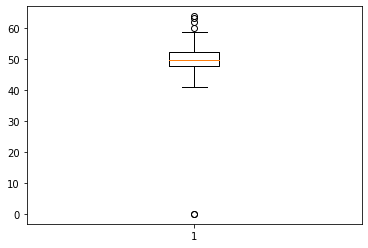

In [688]:
plt.boxplot(cleaned_ma3_list)
plt.show()

Create five number summary of the running 7 day standard deviation column

In [689]:
ma_count_list = list(cusum_nike_raw['sigma_7day'])
cleaned_ma7_list = [0.0 if math.isnan(x) else x for x in ma_count_list]
cleaned_ma7_list[:5]

[0.0, 0.0, 0.0, 0.0, 0.0]

In [690]:
print("Minimum value: ", np.min(cleaned_ma7_list))
print("Maximum value: ", np.max(cleaned_ma7_list))
print("Standard Deviation: ", np.std(cleaned_ma7_list))
print("Mean: ", np.mean(cleaned_ma7_list))
print("Median: ", np.median(cleaned_ma7_list))

Minimum value:  0.0
Maximum value:  19.485036994233976
Standard Deviation:  2.831848038212238
Mean:  4.132231322197929
Median:  3.683941988065031


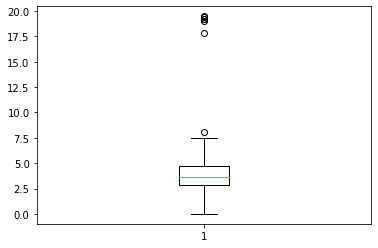

In [691]:
plt.boxplot(cleaned_ma7_list)
plt.show()

## AR Model Forecasting

Conduct a timeseries forecasting analysis using the ARIMA model, using the Nike dataframe and counts as a base testing

In [692]:
from statsmodels.tsa.arima_model import ARIMA
from random import random

Slice a new dataframe with the Nike values

In [693]:
nike_forecast = cusum_nike_raw[['date','Nike']]
nike_forecast.head(5)

,date,Nike
0,2019-11-16,57
1,2019-11-17,52
2,2019-11-18,52
3,2019-11-19,53
4,2019-11-20,54


Verify the datatypes of the new dataframe

In [694]:
nike_forecast.dtypes

date    datetime64[ns]
Nike             int64
dtype: object

In [695]:
from random import randrange
series = [i+randrange(10) for i in range(1,100)]
series[:10]

[5, 10, 7, 7, 13, 6, 8, 12, 18, 15]

Slice out cummulative data summary

In [696]:
nike_forecast = cusum_nike_raw[['date','Nike']]
nike_forecast

,date,Nike
0,2019-11-16,57
1,2019-11-17,52
2,2019-11-18,52
3,2019-11-19,53
4,2019-11-20,54
...,...,...
260,2020-10-21,51
261,2020-10-23,46
262,2020-10-24,44
263,2020-10-25,45


Set the 'date' column as the index for the dataframe

In [697]:
nike_forecast.set_index('date', inplace=True)

Plot the sliced dataframe

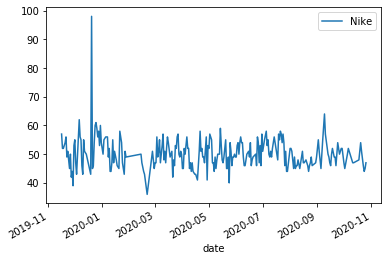

In [698]:
nike_forecast.plot()

Plot the auto correlation

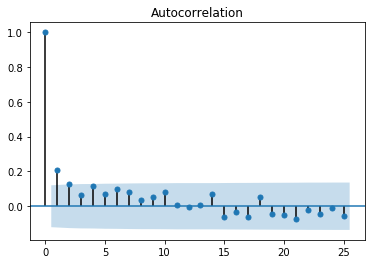

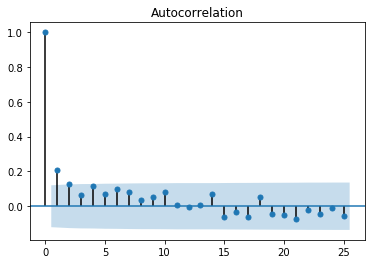

In [699]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(nike_forecast)

Calculate the differences between individual dates

In [700]:
nike_diff = nike_forecast.diff(periods = 1)
nike_diff.reset_index()

,date,Nike
0,2019-11-16,NaN
1,2019-11-17,-5.0
2,2019-11-18,0.0
3,2019-11-19,1.0
4,2019-11-20,1.0
...,...,...
260,2020-10-21,-3.0
261,2020-10-23,-5.0
262,2020-10-24,-2.0
263,2020-10-25,1.0


In [701]:
nike_diff.dtypes

Nike    float64
dtype: object

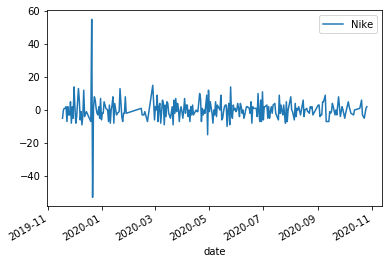

In [702]:
nike_diff.plot()

Plot the autocorrelation for the nike difference dataframe

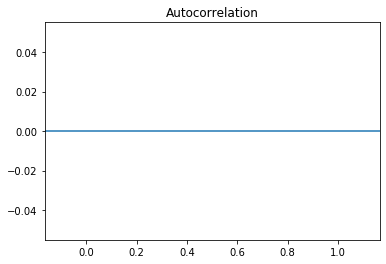

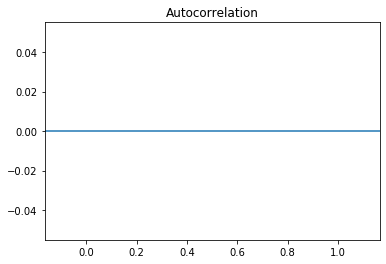

In [703]:
plot_acf(nike_diff)

Convert Nike values to a numpy array for calcualtion

In [704]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

X = nike_forecast[['Nike']].to_numpy()
X[:5]

array([[57],
       [52],
       [52],
       [53],
       [54]])

Create the train set

In [705]:
train = X[:80]
train.size

80

Create the test set

In [706]:
test = X[81:]
test.size

184

Create a predictions list to store the prediction values

In [707]:
predictions = []

Build the AR model

In [708]:
model_ar = AR(train)
model_ar_fit = model_ar.fit()

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/ar_model.py:691: FutureWarning:


statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)




Predict the values from index 80 to 108

In [709]:
predictions = model_ar_fit.predict(start = 80, end= 108)

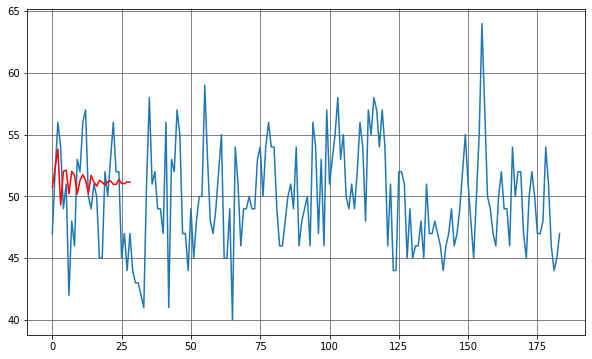

In [710]:
plt.figure(figsize = (10,6))
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.plot(test)
plt.plot(predictions, color ='red')

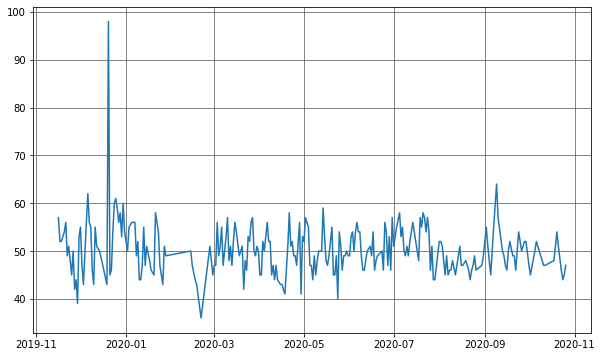

In [711]:
plt.figure(figsize = (10,6))

plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.plot(nike_forecast)

## ARIMA Model Forecast

In [712]:
from statsmodels.tsa.arima_model import ARIMA

Invoke the ARIMA model function in order to build the forecast model

In [713]:
# parameters: p , d, q
# p = periods taken for autoregessive model
# d = order of integrated, number of times differences is executed
# q = periods in moving average model

model_arima = ARIMA(train, order = (10,0,1) )
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

570.3465692952202


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Fit the model with the test data set

In [714]:
arima_predictions = model_arima_fit.forecast(steps = 25)[0] # predict 25 values
arima_predictions

array([50.13288756, 51.93329046, 52.28120157, 50.53405321, 51.45455013,
       51.40359402, 50.90072373, 51.26528165, 51.30684559, 51.23167852,
       51.03306016, 51.25739524, 51.14876359, 51.17949003, 51.13460063,
       51.19943083, 51.12012824, 51.17677515, 51.13274311, 51.17895187,
       51.11969023, 51.17780817, 51.121408  , 51.17504964, 51.11876851])

Plot the forecasted data against the test data

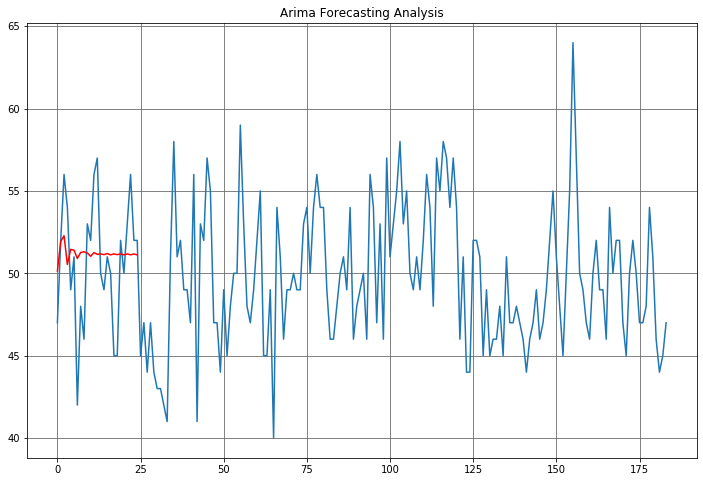

In [715]:
plt.figure(figsize = (12,8))
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.title("Arima Forecasting Analysis")
plt.plot(test)
plt.plot(arima_predictions, color ='red')

In [716]:
print(model_arima_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   80
Model:                    ARMA(10, 1)   Log Likelihood                -272.173
Method:                       css-mle   S.D. of innovations              7.252
Date:                Mon, 26 Oct 2020   AIC                            570.347
Time:                        11:19:24   BIC                            601.313
Sample:                             0   HQIC                           582.762
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         51.1443      1.416     36.130      0.000      48.370      53.919
ar.L1.y       -0.9726      0.112     -8.711      0.000      -1.191      -0.754
ar.L2.y        0.0326      0.155      0.210      0.8

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:1490: RuntimeWarning:

invalid value encountered in sqrt

/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning:

invalid value encountered in greater

/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning:

invalid value encountered in less

/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning:

invalid value encountered in less_equal



### AIC Value Calculation

Calculate the AIC value in order to identify the optimized pdq set for the optimized model.  Lowest value is taken and inputted back in the ARIMA model

In [717]:
import itertools
p=d=q=range(0,5)
pdq = list(itertools.product(p,d,q))
pdq[:10]

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4)]

In [718]:
for parameter in pdq:
    try:
        model_arima = ARIMA(train, order = parameter )
        model_arima_fit = model_arima.fit()
        print(parameter, model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 554.2808313156016
(0, 0, 1) 555.9200161802585
(0, 0, 2) 557.8432431550306
(0, 0, 3) 559.5962816564286
(0, 0, 4) 558.1003669023669
(0, 1, 0) 597.017746712072
(0, 1, 1) 552.0678561635393
(0, 1, 2) 553.9081002996134
(0, 1, 3) 555.1622614005023
(0, 1, 4) 556.865535979371
(0, 2, 0) 674.9759525065061
(0, 2, 1) 596.8710921417369
(0, 2, 2) 557.6143114480178
(0, 2, 3) 557.965239410121
(0, 2, 4) 558.6973604800401
(1, 0, 0) 555.8923350168056
(1, 0, 1) 555.6223271330946
(1, 0, 2) 557.2392684976894
(1, 0, 3) 557.88176802862
(1, 0, 4) 558.6512860871011
(1, 1, 0) 578.013341545332
(1, 1, 1) 553.9461945407907
(1, 1, 2) 555.5099307578686
(1, 1, 3) 556.1700447149949
(1, 1, 4) 558.3093321176175
(1, 2, 0) 634.704160681561
(2, 0, 0) 557.7608933235715
(2, 0, 1) 557.3498072479615


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available



(2, 0, 2) 559.6430804359518
(2, 0, 3) 559.3069844587578
(2, 0, 4) 560.3882725524186
(2, 1, 0) 569.5067857525362
(2, 1, 1) 555.2170721947338
(2, 1, 2) 556.8807576252196


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available



(2, 1, 3) 558.7617392355628
(2, 1, 4) 558.4042488972648
(2, 2, 0) 618.4179801198568
(3, 0, 0) 559.2345289124971
(3, 0, 1) 558.3348433680812
(3, 0, 2) 559.2157668032669
(3, 0, 3) 560.1567384565661
(3, 0, 4) 561.3384715816387
(3, 1, 0) 559.828711193566
(3, 1, 1) 556.2547973650321
(3, 1, 2) 557.9592205339302
(3, 1, 4) 560.3691405466732
(3, 2, 0) 598.7020447724015
(3, 2, 1) 562.1658062628508
(4, 0, 0) 557.4681121757787
(4, 0, 1) 558.8048517206412
(4, 0, 2) 560.7170444888285
(4, 0, 3) 561.121609739115


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available



(4, 0, 4) 561.689794571653
(4, 1, 0) 559.6023913657624
(4, 1, 1) 556.46975184114
(4, 1, 2) 557.6992603703669
(4, 2, 0) 590.4716156370819
(4, 2, 1) 562.2399335643245
(4, 2, 2) 561.5793233411919


## Forecast

In [719]:
nike_count = cusum_nike_raw[['Nike']]
nike_count

,Nike
0,57
1,52
2,52
3,53
4,54
...,...
260,51
261,46
262,44
263,45


Create the training and test sets

In [720]:
train_length = int(len(nike_count.Nike)*.8)
test_length = len(nike_count) - train_length

print("Train length {}".format(train_length))
print("Test length {}".format(test_length))

Train length 212
Test length 53


In [721]:
train = nike_count.Nike[:train_length]
test = nike_count.Nike[train_length:]

In [722]:
test_length = len(test)
test_length

53

Forecast the values

In [723]:
fc, se, conf = model_arima_fit.forecast(test_length, alpha=0.05)  # 95% conf
fc

array([50.98306246, 52.17135249, 52.90781696, 51.8643244 , 52.19573958,
       52.53763569, 52.80962325, 52.82692538, 52.99328053, 53.19085394,
       53.38471993, 53.5446114 , 53.72134703, 53.90759918, 54.09683006,
       54.28383062, 54.47478071, 54.66976848, 54.86784941, 55.06814483,
       55.27136608, 55.47765431, 55.68689656, 55.8989513 , 56.11389357,
       56.33175691, 56.55253072, 56.7761934 , 57.00275171, 57.23221163,
       57.46457264, 57.69983164, 57.93798902, 58.17904571, 58.4230018 ,
       58.66985685, 58.91961084, 59.17226392, 59.42781611, 59.68626735,
       59.94761764, 60.21186699, 60.47901541, 60.7490629 , 61.02200944,
       61.29785504, 61.57659971, 61.85824344, 62.14278623, 62.43022808,
       62.720569  , 63.01380897, 63.30994801])

Make a pandas series

In [724]:
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

Plot the final findings 

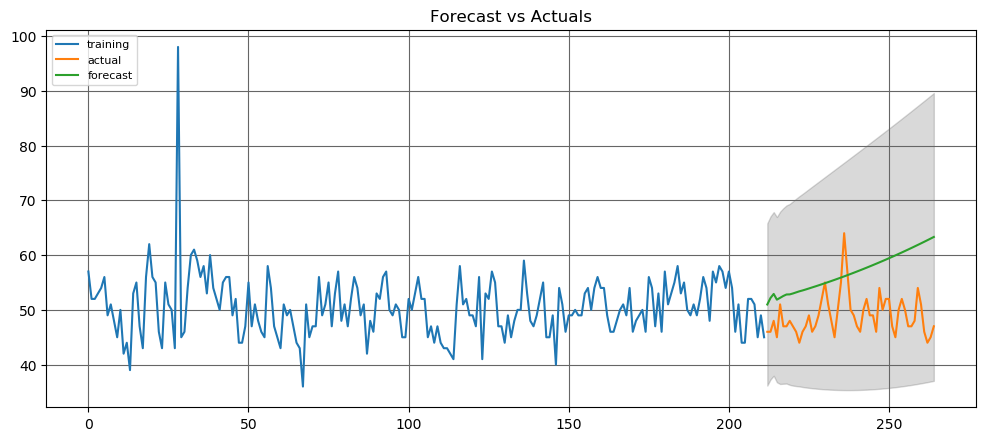

In [725]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# Program Completed

In [726]:
program_end = t.time() - program_start
print("Total time for program execution: ", round(program_end, 2), " seconds")

Total time for program execution:  33.07  seconds
